In [26]:
#relevant import statements
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from operator import itemgetter

In [27]:
#main_filename = '/content/drive/MyDrive/Team ASAPP 1B/dataset reduction/smaller datasets/delexed_removed_main.json'
main_filename = '/content/8_1_1_small.json.json' #based on locally uploaded file
with open(main_filename, 'r') as file:
    data = json.load(file)
all_conversations = data['train'] + data['dev'] + data['test'] # ignore train test dev keys
df = pd.json_normalize(all_conversations)


Average and Distribution of Metrics:
       total_utterances  customer_utterances  agent_utterances  \
count            100.00               100.00            100.00   
mean              21.44                 8.61              9.21   
min                7.00                 2.00              1.00   
max               44.00                24.00             17.00   

       action_utterances  has_email  has_name  has_phone_number  has_order_id  \
count             100.00     100.00    100.00             100.0        100.00   
mean                3.62       0.22      0.73               0.1          0.45   
min                 2.00       0.00      0.00               0.0          0.00   
max                13.00       1.00      1.00               1.0          1.00   

       char_length  
count       100.00  
mean        861.65  
min         327.00  
max        1820.00  

Most Common Flows:
flow
purchase_dispute        14
order_issue             13
account_access          13
shipping_issue

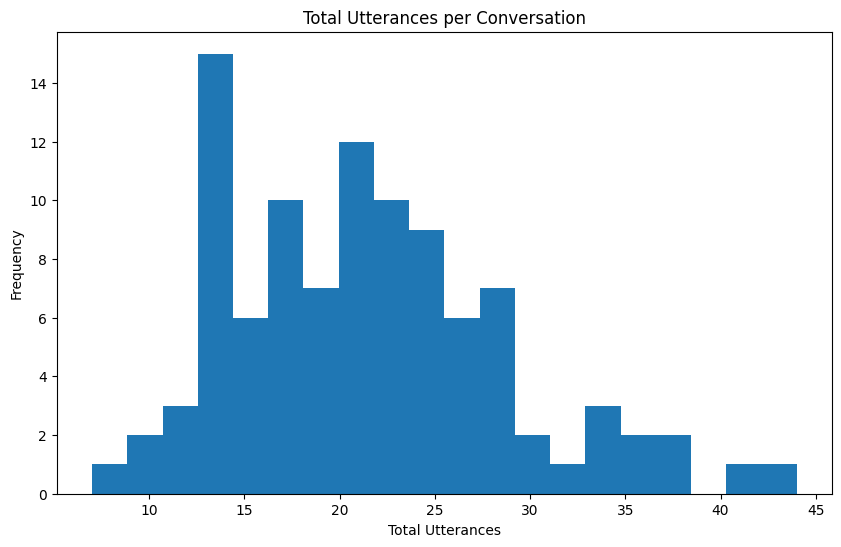

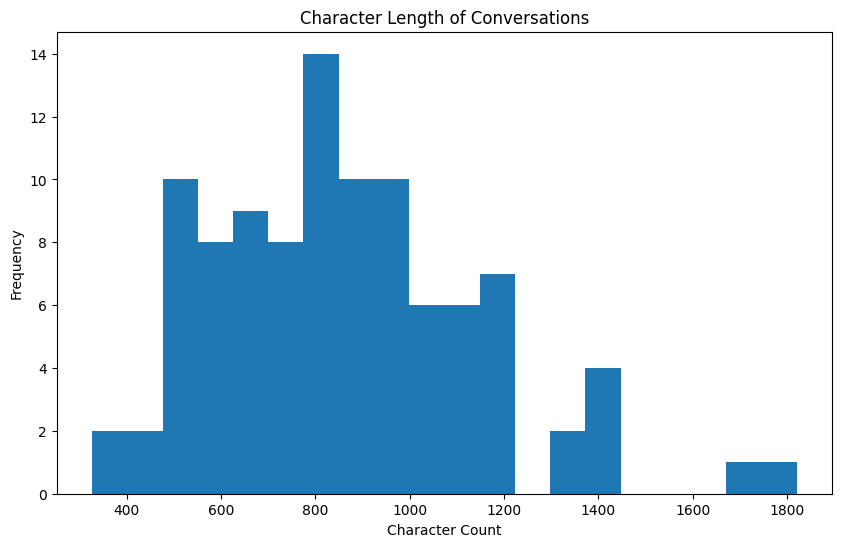

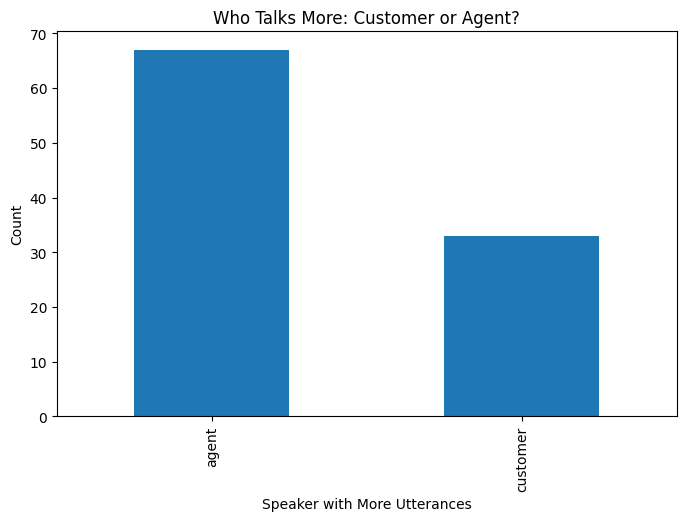


Most Common Labels and Their Counts:
scenario.personal.customer_name: 100
scenario.personal.member_level: 100
scenario.order.street_address: 100
scenario.order.full_address: 100
scenario.order.city: 100
scenario.order.state: 100
scenario.order.zip_code: 100
scenario.product.names: 100
scenario.product.amounts: 100
scenario.flow: 100
scenario.subflow: 100
scenario.personal.phone: 97
scenario.order.num_products: 72
scenario.order.products: 72
scenario.personal.username: 54
scenario.order.order_id: 53
scenario.personal.email: 51
scenario.personal.account_id: 34
scenario.order.shipping_status: 20
scenario.order.purchase_date: 18
scenario.order.packaging: 8
scenario.order.payment_method: 8
scenario.personal.pin_number: 3
scenario.personal.security_answer: 2
scenario.personal.password: 2
scenario.personal.order_id: 1


In [28]:
metrics = []

for _, row in df.iterrows():
    # check for presence
    # has_email = pd.notna(row.get('scenario.personal.email'))
    # has_name = pd.notna(row.get('scenario.personal.customer_name'))
    # has_phone_number = pd.notna(row.get('scenario.personal.phone'))
    # has_order_id = pd.notna(row.get('scenario.order.order_id'))

    conversation = row['original']
    total_utterances = len(conversation)
    customer_utterances = sum(1 for msg in conversation if msg[0] == 'customer')
    agent_utterances = sum(1 for msg in conversation if msg[0] == 'agent')
    action_utterances = sum(1 for msg in conversation if msg[0] == 'action')
    has_email = has_name = has_phone_number = has_order_id = 0

    for msg in conversation:
      if str(row.get('scenario.personal.email')).lower() in msg[1].lower():
        has_email = 1
      if str(row.get('scenario.personal.customer_name')).lower() in msg[1].lower():
        has_name = 1
      if str(row.get('scenario.personal.phone')).lower() in msg[1].lower():
        has_phone_number = 1
      if str(row.get('scenario.order.order_id')).lower() in msg[1].lower():
        has_order_id = 1

    # who talks more
    if customer_utterances > agent_utterances:
      who_talks_more = 'customer'
    else : who_talks_more = 'agent'

    # char count in convo
    char_length = sum(len(msg[1]) for msg in conversation if isinstance(msg[1], str))

    metrics.append({
        'total_utterances': total_utterances,
        'customer_utterances': customer_utterances,
        'agent_utterances': agent_utterances,
        'action_utterances': action_utterances,
        'who_talks_more': who_talks_more,
        'has_email': has_email,
        'has_name': has_name,
        'has_phone_number': has_phone_number,
        'has_order_id': has_order_id,
        'flow': row.get('scenario.flow'),
        'subflow': row.get('scenario.subflow'),
        'char_length': char_length,
        'has_email': has_email,
        'has_name': has_name,
        'has_phone_number': has_phone_number,
        'has_order_id': has_order_id
    })

metrics_df = pd.DataFrame(metrics)
# print(metrics_df.head())

print("\nAverage and Distribution of Metrics:")
print(metrics_df.describe().loc[['count', 'mean', 'min', 'max']])

# most common flows and subflows
print("\nMost Common Flows:")
print(metrics_df['flow'].value_counts().head(10))
print("\nMost Common Subflows:")
print(metrics_df['subflow'].value_counts().head(10))

# graph: utterance length per convo
plt.figure(figsize=(10, 6))
plt.hist(metrics_df['total_utterances'], bins=20)
plt.title("Total Utterances per Conversation")
plt.xlabel("Total Utterances")
plt.ylabel("Frequency")
plt.show()

# graph: character length distribution
plt.figure(figsize=(10, 6))
plt.hist(metrics_df['char_length'], bins=20)
plt.title("Character Length of Conversations")
plt.xlabel("Character Count")
plt.ylabel("Frequency")
plt.show()

# graph: Who talks more
plt.figure(figsize=(8, 5))
metrics_df['who_talks_more'].value_counts().plot(kind='bar')
plt.title("Who Talks More: Customer or Agent?")
plt.xlabel("Speaker with More Utterances")
plt.ylabel("Count")
plt.show()

# identify cols that start with 'scenario' to capture all scenario-related fields
label_columns = [col for col in df.columns if col.startswith('scenario')]

# initialize dict
label_counts = {}

# count the presence of each label in the dataset
for label in label_columns:
    # count non-null
    label_counts[label] = df[label].notna().sum()

# sort labels by their frequency of appearance
sorted_labels = sorted(label_counts.items(), key=lambda x: x[1], reverse=True)

print("\nMost Common Labels and Their Counts:")
for label, count in sorted_labels:
    print(f"{label}: {count}")


In [29]:
print(df.columns)

Index(['convo_id', 'original', 'scenario.personal.account_id',
       'scenario.personal.customer_name', 'scenario.personal.member_level',
       'scenario.personal.phone', 'scenario.order.street_address',
       'scenario.order.full_address', 'scenario.order.city',
       'scenario.order.num_products', 'scenario.order.order_id',
       'scenario.order.products', 'scenario.order.shipping_status',
       'scenario.order.state', 'scenario.order.zip_code',
       'scenario.product.names', 'scenario.product.amounts', 'scenario.flow',
       'scenario.subflow', 'scenario.personal.email',
       'scenario.personal.username', 'scenario.order.purchase_date',
       'scenario.order.packaging', 'scenario.order.payment_method',
       'scenario.personal.order_id', 'scenario.personal.security_answer',
       'scenario.personal.pin_number', 'scenario.personal.password'],
      dtype='object')


In [30]:
#calculate how many customers are a guest, bronze, silver, and gold membership levels! - in the dataset
membership_distribution = df['scenario.personal.member_level'].value_counts()
print("Customer Membership Distribution:\n", membership_distribution)

Customer Membership Distribution:
 scenario.personal.member_level
guest     31
gold      28
silver    22
bronze    19
Name: count, dtype: int64


In [31]:
#see what the most common issue for each member level is + the amount of each
membership_common_issue = df.groupby('scenario.personal.member_level')['scenario.flow'].apply(lambda x: x.value_counts().head(1))
print("Most Common Issue Based on Membership Level:\n", membership_common_issue)

Most Common Issue Based on Membership Level:
 scenario.personal.member_level                  
bronze                          order_issue         4
gold                            order_issue         7
guest                           purchase_dispute    7
silver                          product_defect      4
Name: scenario.flow, dtype: int64


In [32]:
#top 10 products mentioned within dataset
from collections import Counter

most_product_mentions = Counter([product for sublist in df['scenario.product.names'] for product in sublist])
print("Top 10 Mentioned Products:\n", most_product_mentions.most_common(10))

Top 10 Mentioned Products:
 [('calvin_klein jeans', 8), ('tommy_hilfiger jeans', 8), ('guess shirt', 7), ('michael_kors jacket', 7), ('calvin_klein boots', 7), ('michael_kors shirt', 5), ('guess jacket', 5), ('tommy_hilfiger boots', 5), ('guess boots', 5), ('tommy_hilfiger jacket', 4)]


In [33]:
#statistics about customer to agent ratio
metrics_df['customer_agent_ratio'] = metrics_df['customer_utterances'] / metrics_df['agent_utterances']
print("Customer-Agent Interaction Ratios:\n", metrics_df['customer_agent_ratio'].describe())

Customer-Agent Interaction Ratios:
 count    100.000000
mean       0.971436
std        0.405414
min        0.272727
25%        0.700000
50%        0.909091
75%        1.175000
max        3.000000
Name: customer_agent_ratio, dtype: float64


In [34]:
#top city/states to indicate most active conversation locations (for customers)
city_counts = df['scenario.order.city'].value_counts()
state_counts = df['scenario.order.state'].value_counts()
print("Queries by City:\n", city_counts.head(10))
print("Queries by State:\n", state_counts.head(10))

Queries by City:
 scenario.order.city
baltimore       14
san mateo       14
newark          13
monterey        12
raleigh         12
san lima        11
jacksonville     8
brighton         8
la fayette       8
Name: count, dtype: int64
Queries by State:
 scenario.order.state
ny    26
ca    21
tx    21
wa    16
mi    16
Name: count, dtype: int64


In [35]:
#calculate a score with total conversaitons and lenght of each to see how complicated the inquires are on average
metrics_df['complexity_score'] = metrics_df['total_utterances'] * metrics_df['char_length']
print("Average Complexity Score:\n", metrics_df['complexity_score'].mean())


Average Complexity Score:
 20256.56
